In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import polyval, polyfit

%matplotlib notebook

# Source : https://github.com/cestastanford/historical-us-city-populations/tree/master/data
df_pop = pd.read_csv("1790-2010_MASTER.csv")
pop1970_2010 = df_pop[df_pop["CityST"]=="Farmington, MI"]
pop1970_2010 = pop1970_2010.transpose()
pop1970_2010 = pop1970_2010.iloc[6:27].transpose()

# Source : https://www.ci.farmington.mi.us/Community/History.aspx#:~:text=Farmington%20was%20first%20settled%20in,several%20years%20later%20in%201828.
# Farmington was first settled in 1824 by Arthur Power
pop1970_2010["1824"] = 1.0

# Source : https://worldpopulationreview.com/us-cities/farmington-mi-population
pop1970_2010["2011"] = 10457.0
pop1970_2010["2012"] = 10530.0
pop1970_2010["2013"] = 10596.0
pop1970_2010["2014"] = 10609.0
pop1970_2010["2015"] = 10563.0
pop1970_2010["2016"] = 10580.0
pop1970_2010["2017"] = 10621.0
pop1970_2010["2018"] = 10565.0
pop1970_2010["2019"] = 10606.0
pop1970_2010["2020"] = 10647.0

pop1970_2010 = pop1970_2010.transpose()
pop1970_2010.index = pop1970_2010.index.astype(int)
pop1970_2010 = pop1970_2010.sort_index()
pop1970_2010.rename(columns={3129:"Pop"}, inplace=True)

<IPython.core.display.Javascript object>


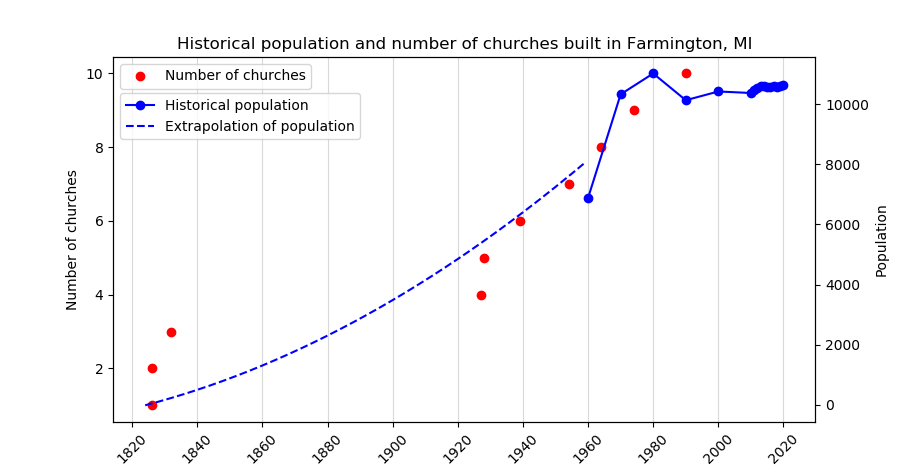

In [100]:
# Source webscrapping from : https://www.yelp.com/search?cflt=churches&find_loc=Farmington%20Hills%2C%20MI&l=g%3A-83.34164188498292%2C42.491459489959816%2C-83.40060756796632%2C42.44042721971273
# file here : https://github.com/RomainChiaraviglio/Farmington-Churches-vs-Population
df_churches = pd.read_csv("churches_farmington.csv")
df_churches = df_churches.sort_values("year")
df_churches["number"] = np.arange(1,len(df_churches)+1,1)
df_churches = df_churches.set_index("year")

pop1970_2010 = pop1970_2010.drop(pop1970_2010[pop1970_2010["Pop"] == 0].index)

fig, ax = plt.subplots()
ax.plot(df_churches["number"], "ro", label='Number of churches')
ax.set_ylabel("Number of churches")
plt.xticks(rotation=45);
ax.set_title("Historical population and number of churches built in Farmington, MI")
ax.locator_params(axis='x', nbins=20)
ax.grid(b=None, which='major', axis='x', color="0.85")

ax2=ax.twinx()
ax2.plot(pop1970_2010.iloc[1:]["Pop"], "b-o", label='Historical population')
ax2.set_ylabel("Population")
plt.xticks(rotation=45);

# Extrapolation of the population before 1960 based on a 2nd degree regression with the five first points
df_reg = pop1970_2010.iloc[:5]

reg = polyfit(df_reg.index, df_reg["Pop"].tolist(),2)
predict = polyval(reg, df_reg.index)
x1 = range(1824,1960)
y_pred = polyval(reg, x1)
ax2.plot(x1,y_pred,'b--', label='Extrapolation of population')

ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))